<a href="https://colab.research.google.com/github/belalE/NIH-Chest-X-rays/blob/main/NIH_Chest_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NIH Chest X-ray Analysis

*Credits:*

Data provided by NIH Clinical Center

Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers, ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017

https://nihcc.app.box.com/v/ChestXray-NIHCC


In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from IPython.display import Image, display

## Importing Data

In [47]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIH/BBox_List_2017.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'BBox_List_2017.csv'
df1.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 984 rows and 6 columns


In [52]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIH/Data_Entry_2017_v2020.csv', delimiter=',')
df2.dataframeName = 'Data_Entry_2017.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 112120 rows and 11 columns


## Exploratory Data Analysis

### Bounding Boxes - Data Frame 1

In [48]:
df1.head(5)

Image Index Finding Label     Bbox [x           y           w  \
0  00013118_008.png   Atelectasis  225.084746  547.019217   86.779661   
1  00014716_007.png   Atelectasis  686.101695  131.543498  185.491525   
2  00029817_009.png   Atelectasis  221.830508  317.053115  155.118644   
3  00014687_001.png   Atelectasis  726.237288  494.951420  141.016949   
4  00017877_001.png   Atelectasis  660.067797  569.780787  200.677966   

           h]  
0   79.186441  
1  313.491525  
2  216.949153  
3   55.322034  
4   78.101695

In [79]:
df1.describe()

Bbox [x           y           w          h]
count  984.000000  984.000000  984.000000  984.000000
mean   398.806111  405.425364  256.334708  252.302547
std    222.700868  166.309995  167.629620  159.443635
min      5.417989   12.837934   27.306667   21.617778
25%    203.093333  293.869045  136.533333  115.674074
50%    340.249735  412.850794  214.340942  216.949153
75%    607.959365  521.641995  311.832381  367.902430
max    905.887831  876.980783  901.120000  873.379894

<Axes: xlabel='Finding Label', ylabel='count'>

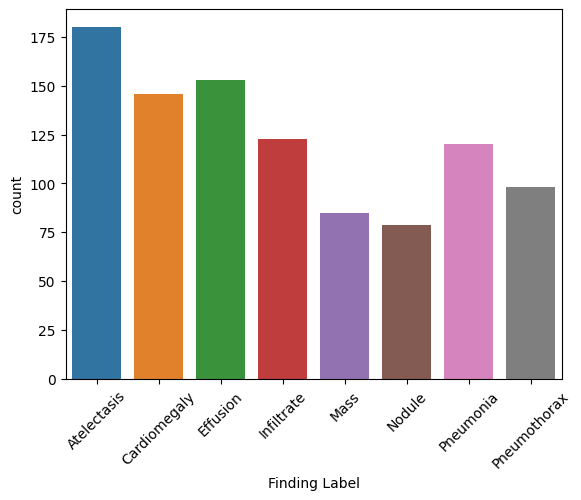

In [49]:
plt.xticks(rotation=45)
sns.countplot(x='Finding Label', data=df1)

<ipython-input-50-b4ee83cc0a59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


<Axes: >

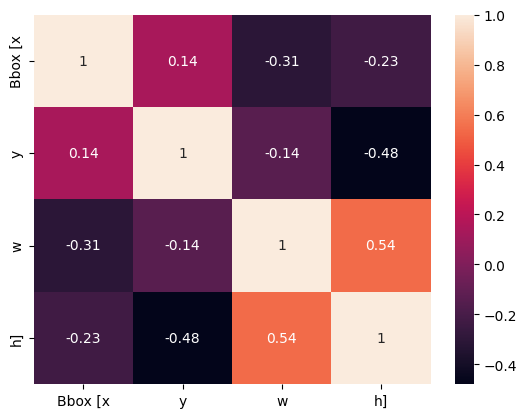

In [50]:
sns.heatmap(df1.corr(), annot=True)

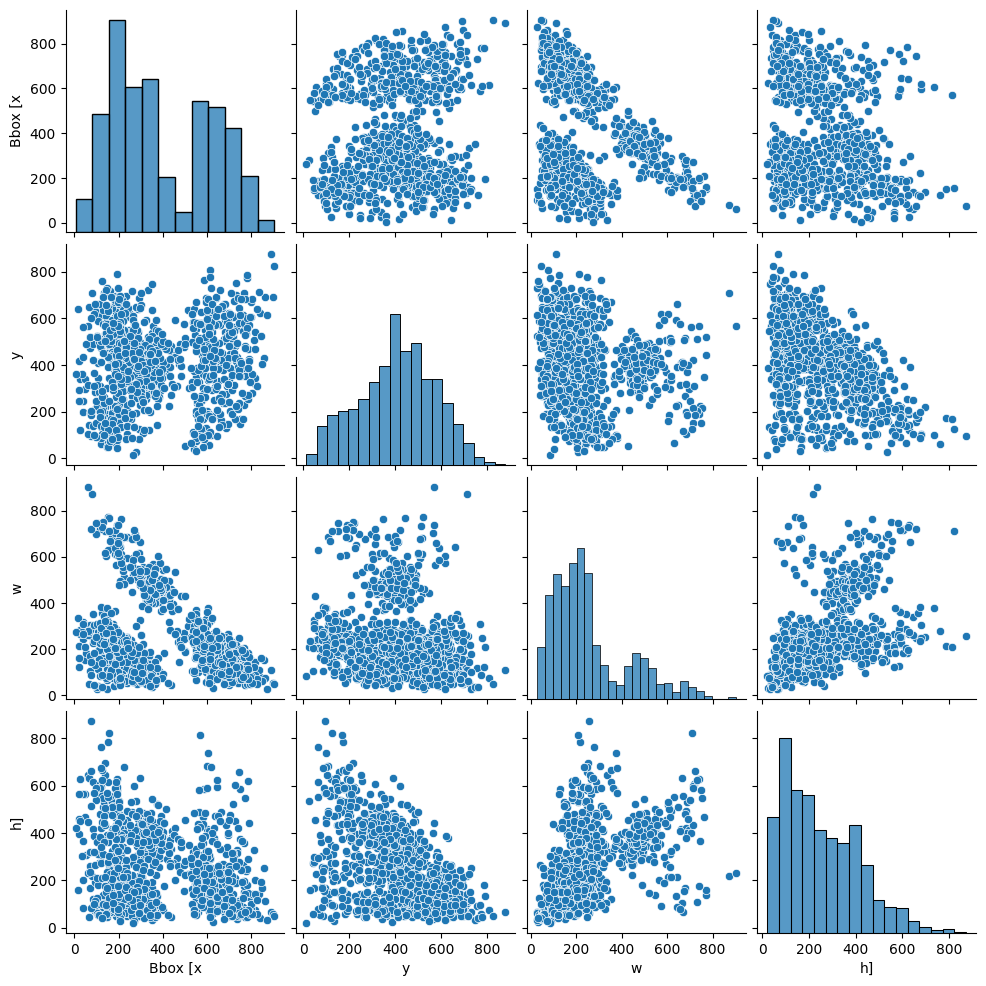

In [51]:
sns.pairplot(df1)

### Patient Data - Data Frame 2

In [39]:
df2.head(5)

Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0                        0.143  0.143  
1                        0.143  0.143  
2                        0.168  0.168  
3                        0.171  0.171  
4                        0.168  0.168

In [77]:
df2.describe()

Follow-up #     Patient ID    Patient Age  OriginalImage[Width  \
count  112120.000000  112120.000000  112120.000000        112120.000000   
mean        8.573751   14346.381743      46.626365          2646.078844   
std        15.406320    8403.876972      16.602680           341.246429   
min         0.000000       1.000000       0.000000          1143.000000   
25%         0.000000    7310.750000      34.000000          2500.000000   
50%         3.000000   13993.000000      49.000000          2518.000000   
75%        10.000000   20673.000000      59.000000          2992.000000   
max       183.000000   30805.000000      95.000000          3827.000000   

             Height]  OriginalImagePixelSpacing[x             y]  
count  112120.000000                112120.000000  112120.000000  
mean     2486.438842                     0.155649       0.155649  
std       401.268227                     0.016174       0.016174  
min       966.000000                     0.115000       0.115000  
25%      2048.000000                     0.143000       0.143000  
50%      2544.000000                     0.143000       0.143000  
75%      2991.000000                     0.168000       0.168000  
max      4715.000000                     0.198800       0.198800

In [58]:
df2['Finding Labels'].nunique()

836

<Axes: xlabel='Patient Gender', ylabel='count'>

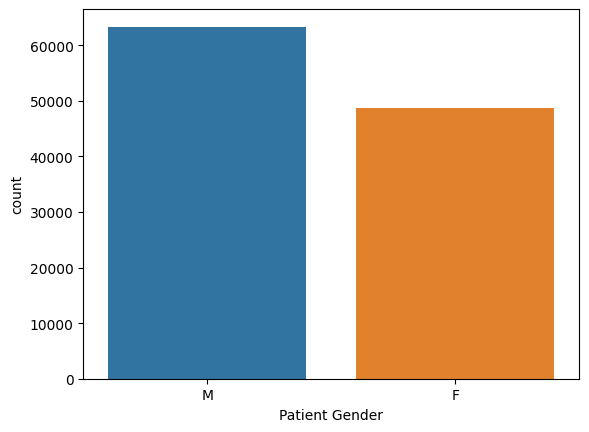

In [69]:
sns.countplot(x='Patient Gender', data=df2)

<Axes: xlabel='View Position', ylabel='count'>

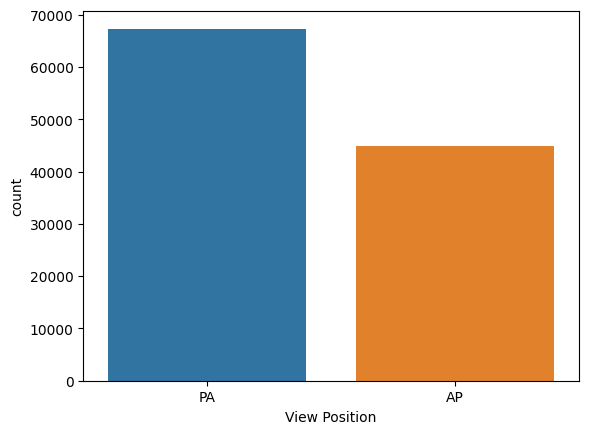

In [70]:
sns.countplot(x='View Position', data=df2)

<Axes: xlabel='Patient Age', ylabel='Count'>

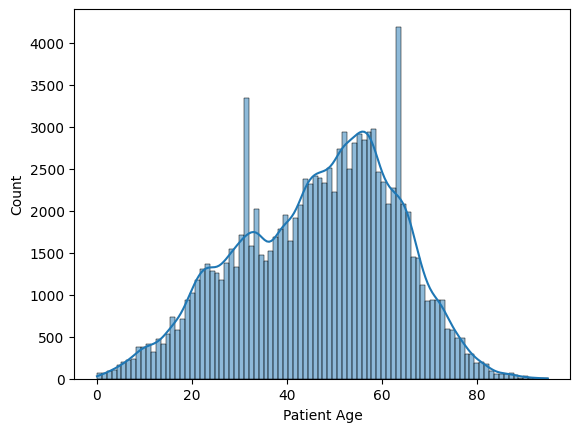

In [76]:
sns.histplot(df2['Patient Age'], kde=True)

<Axes: xlabel='Follow-up #', ylabel='Count'>

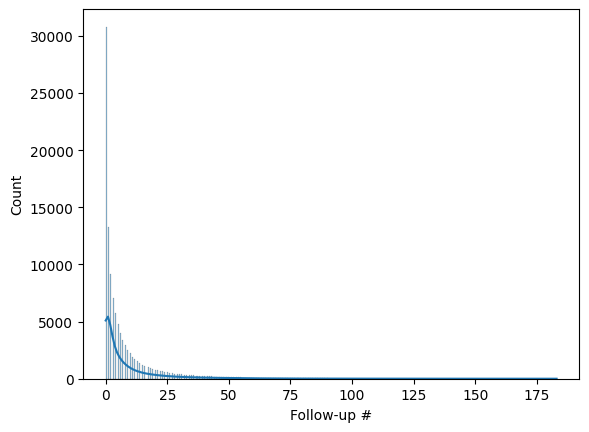

In [82]:
sns.histplot(df2['Follow-up #'], kde=True)

<Axes: xlabel='Finding Labels', ylabel='count'>

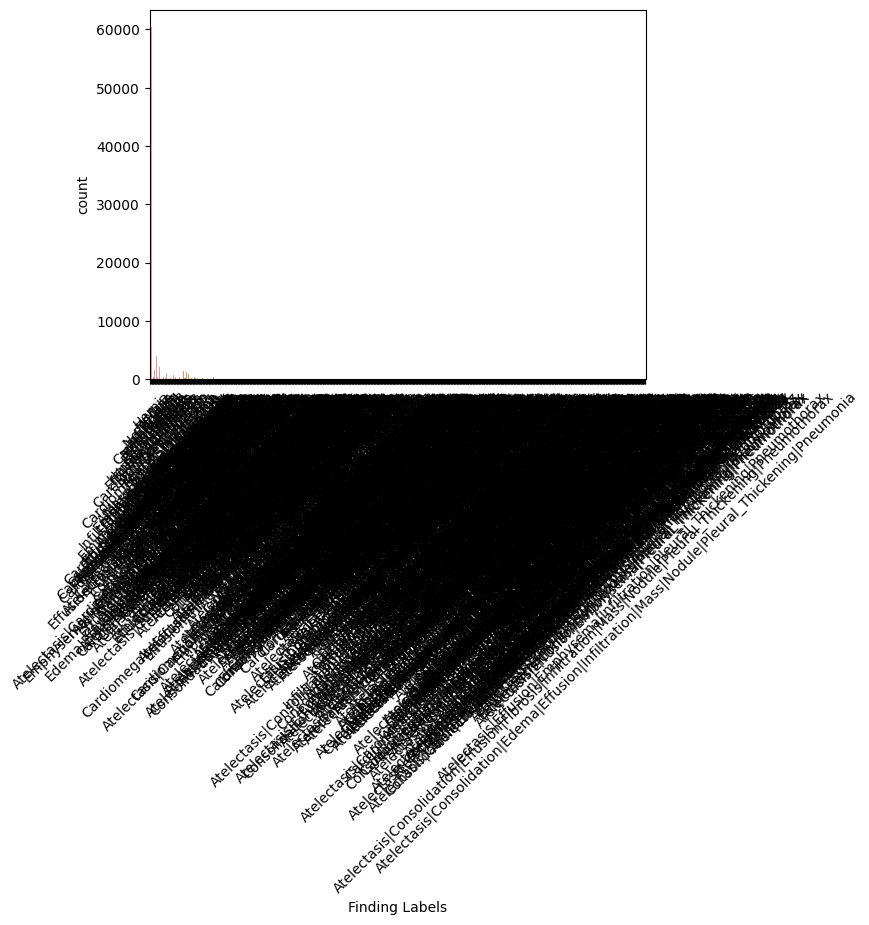

In [53]:
plt.xticks(rotation=45)
sns.countplot(x='Finding Labels', data=df2)

<ipython-input-42-99dbc1571a0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

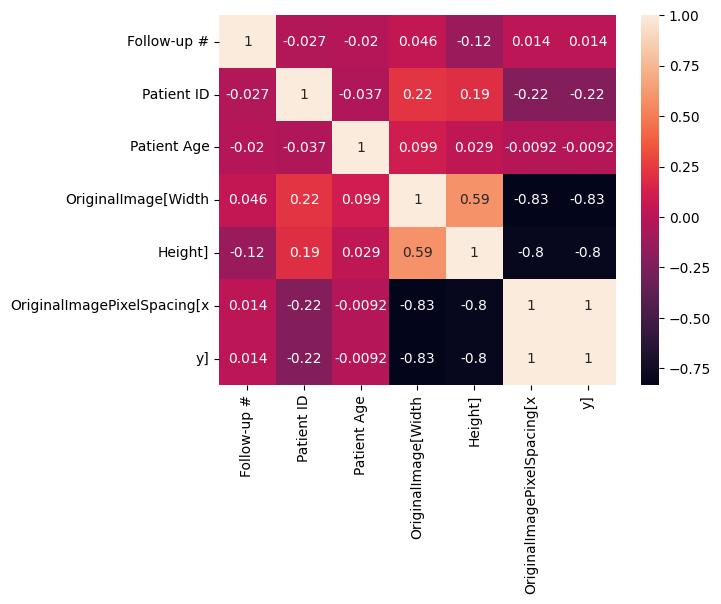

In [42]:
sns.heatmap(df2.corr(), annot=True)

<ipython-input-8-45d7bdcfca59>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


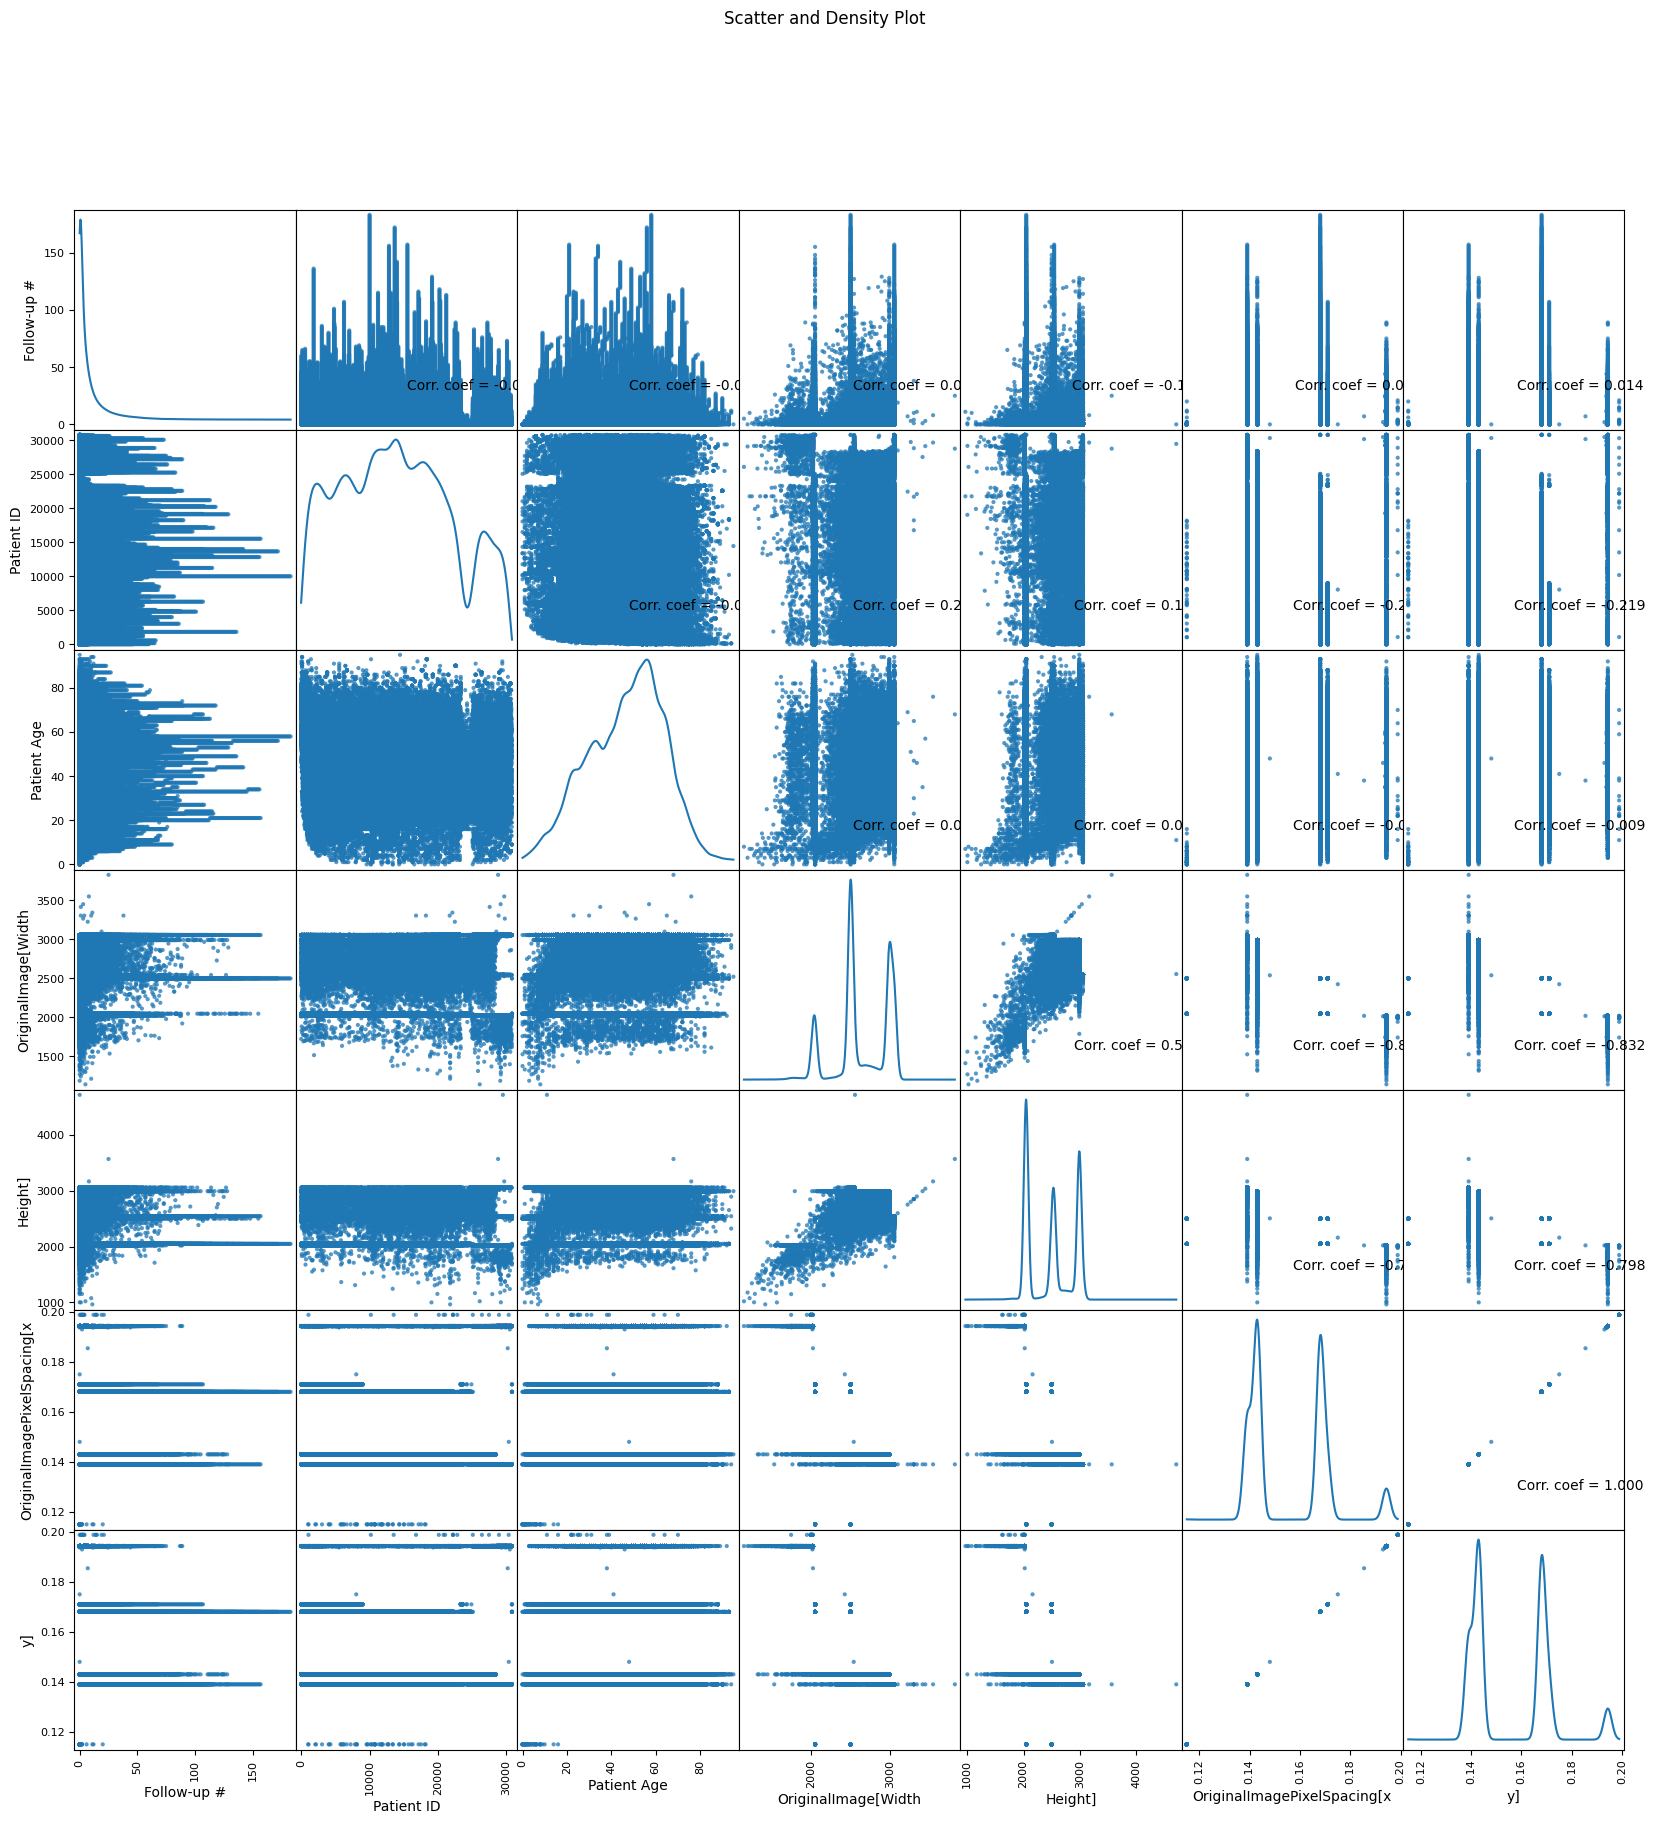

In [ ]:
plotScatterMatrix(df2, 20, 10)

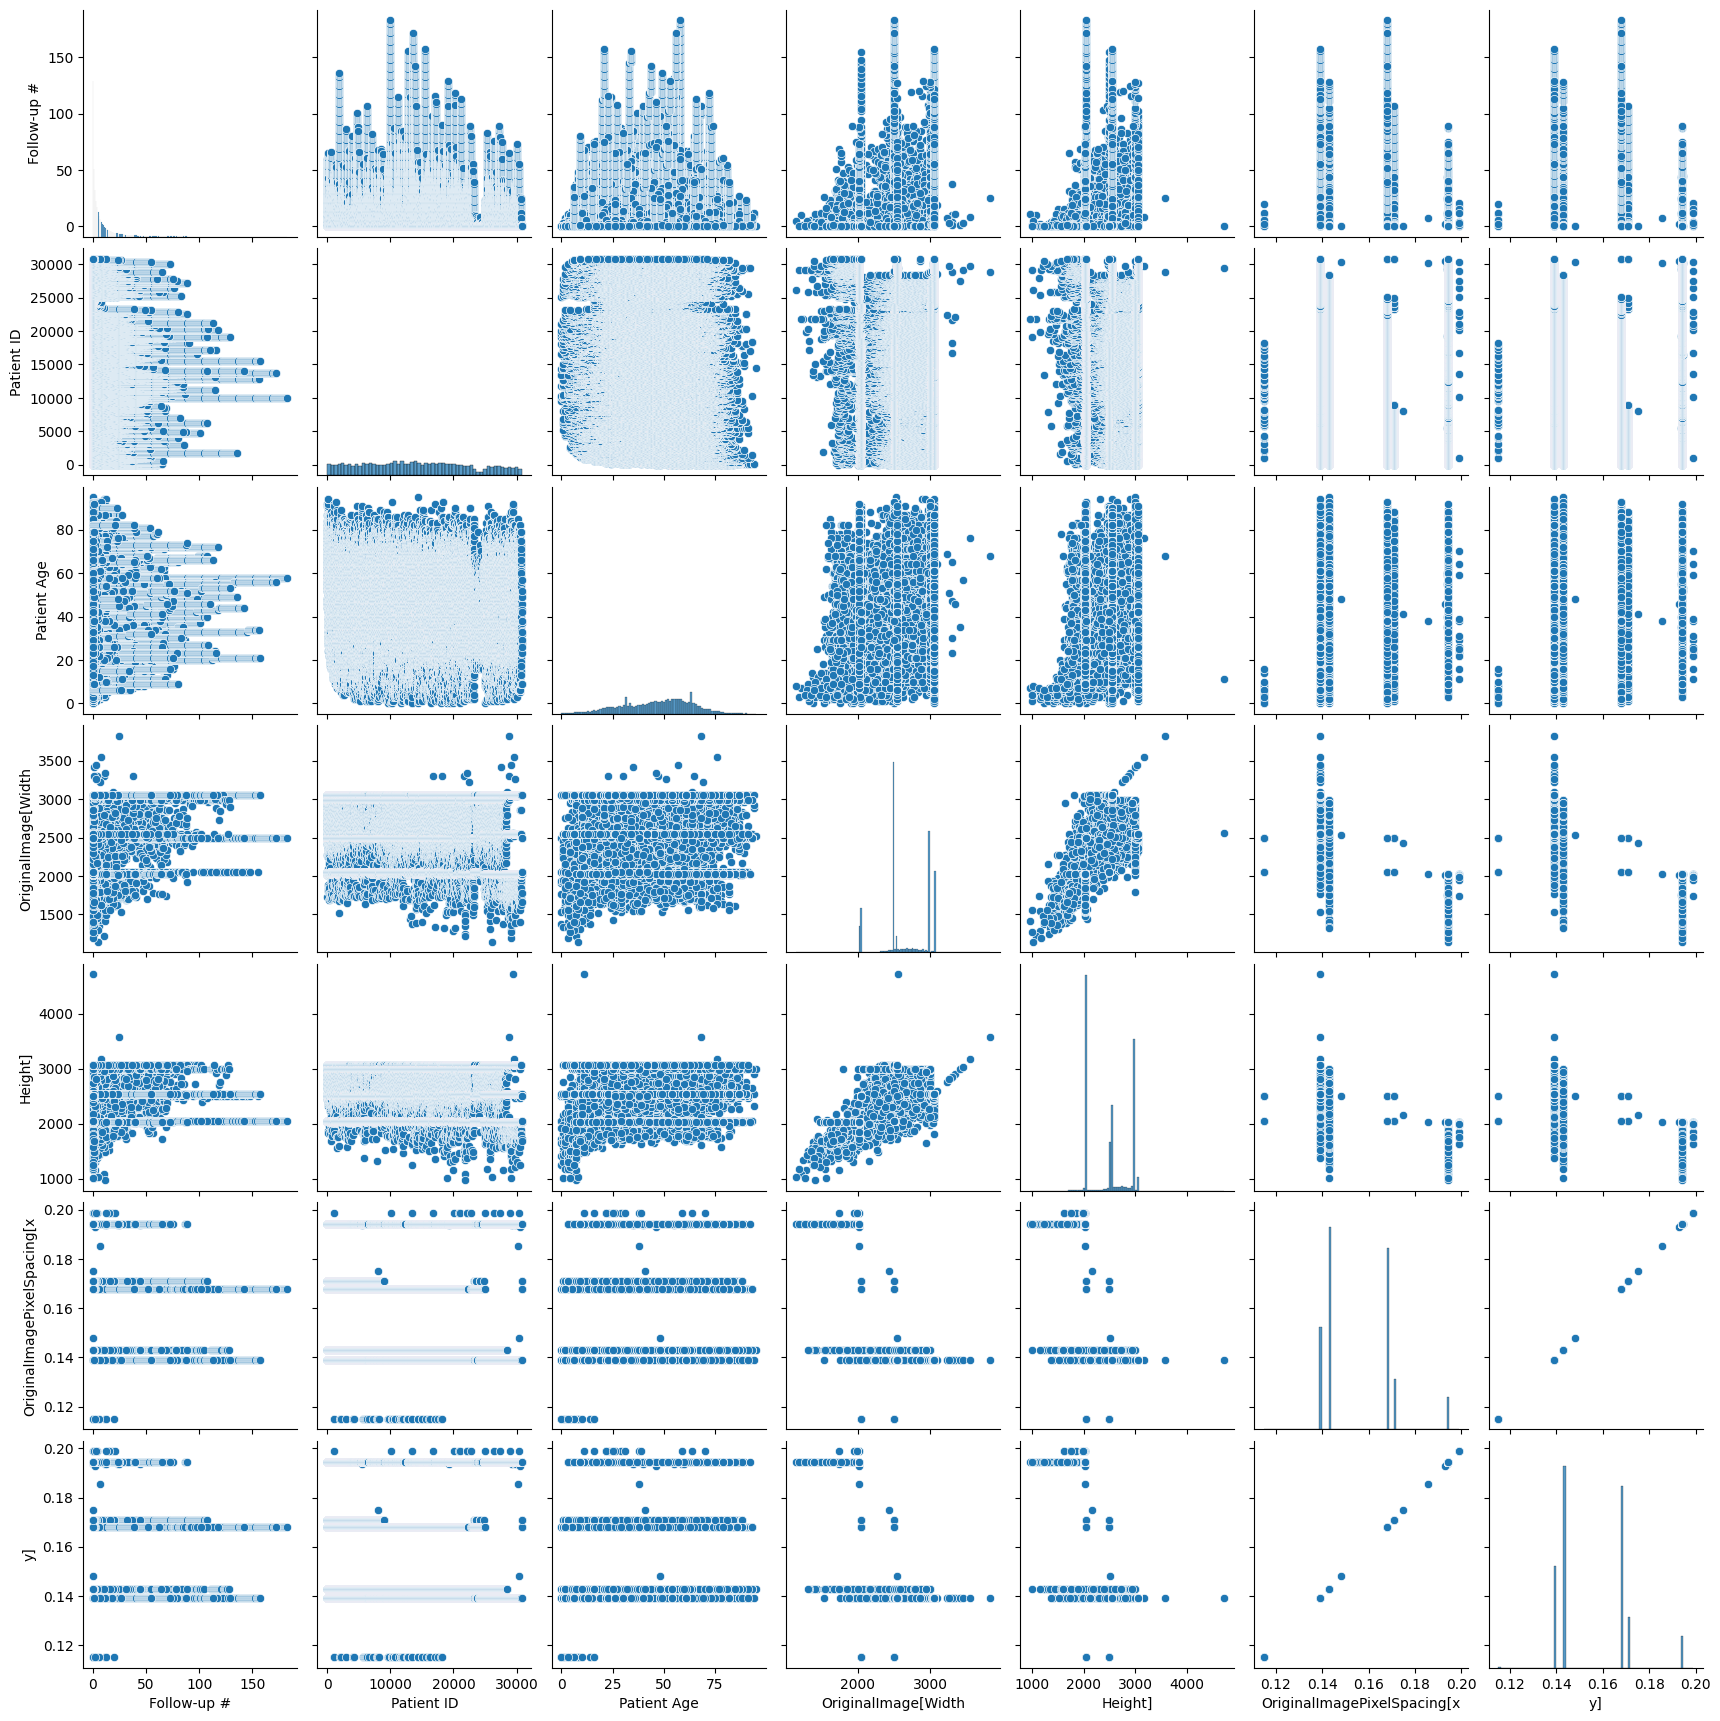

In [43]:
sns.pairplot(df2)

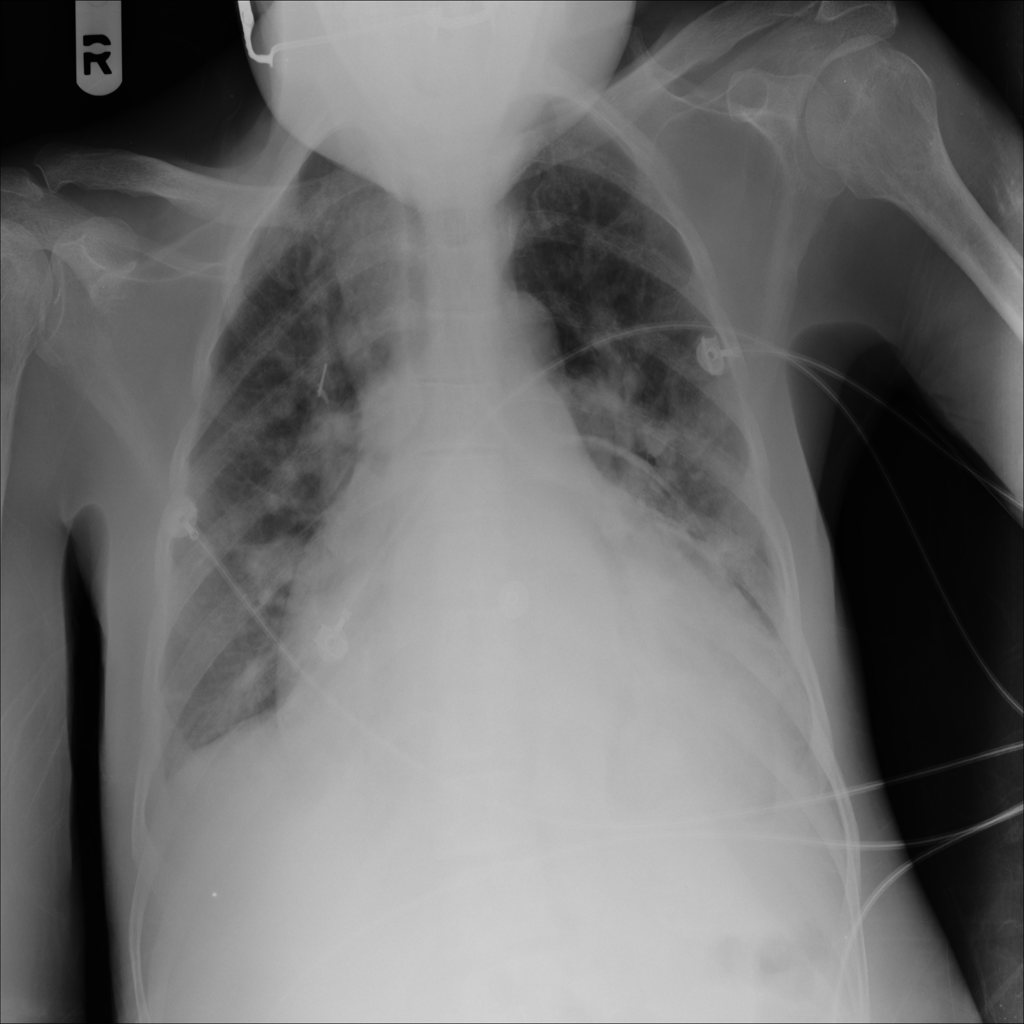

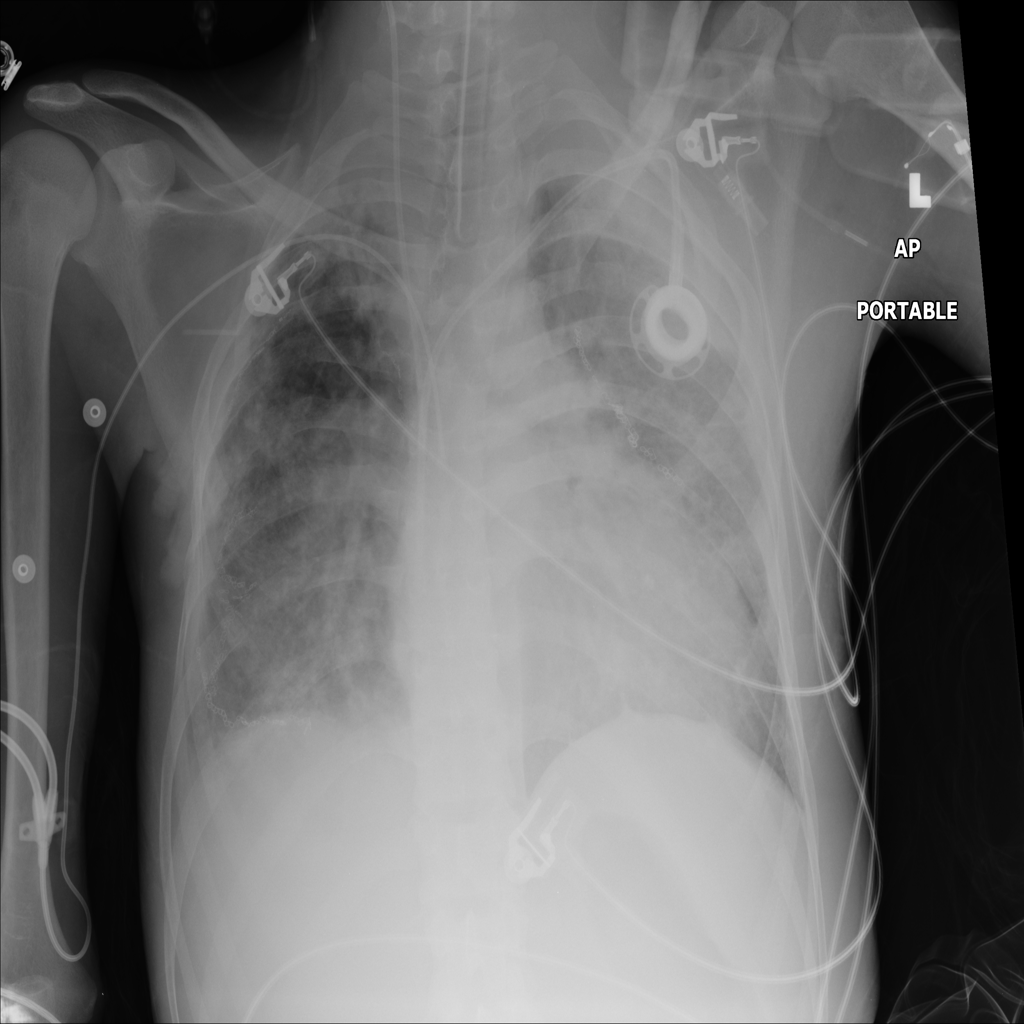

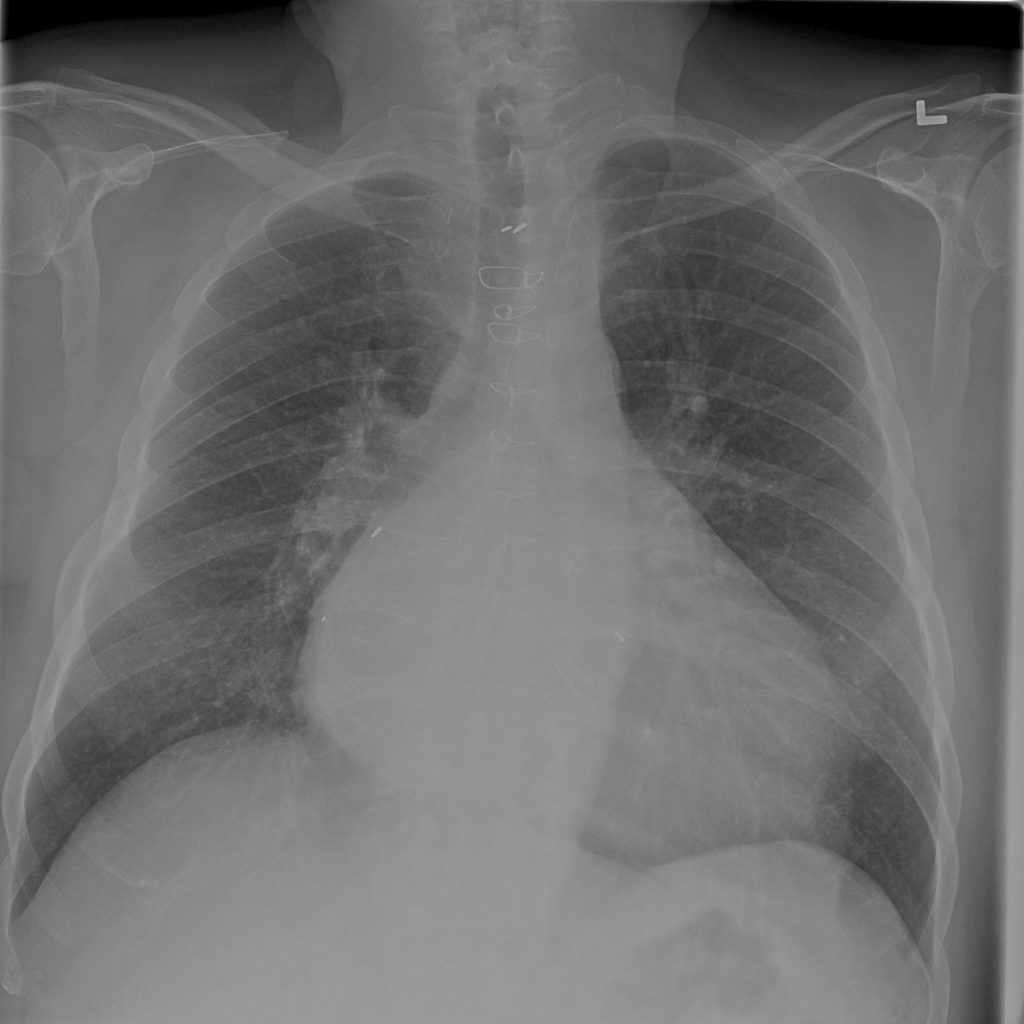

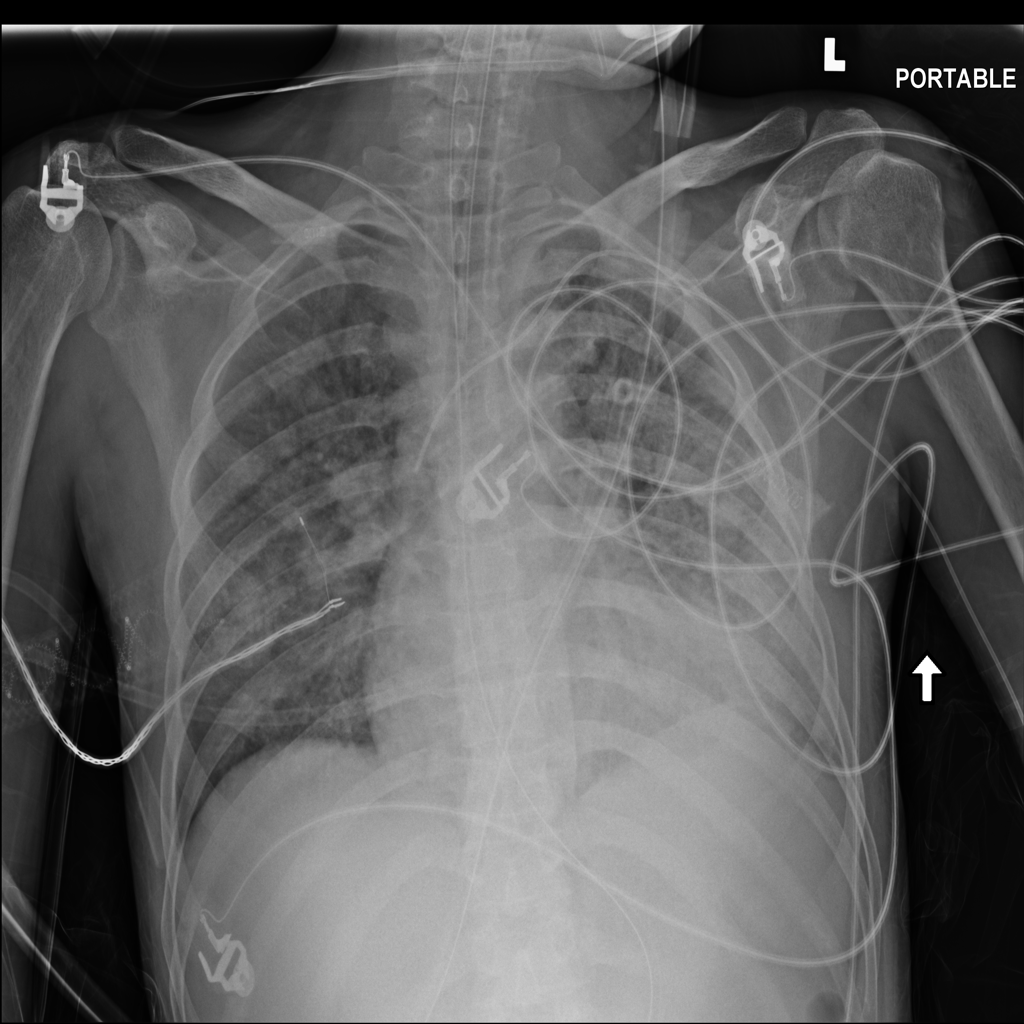

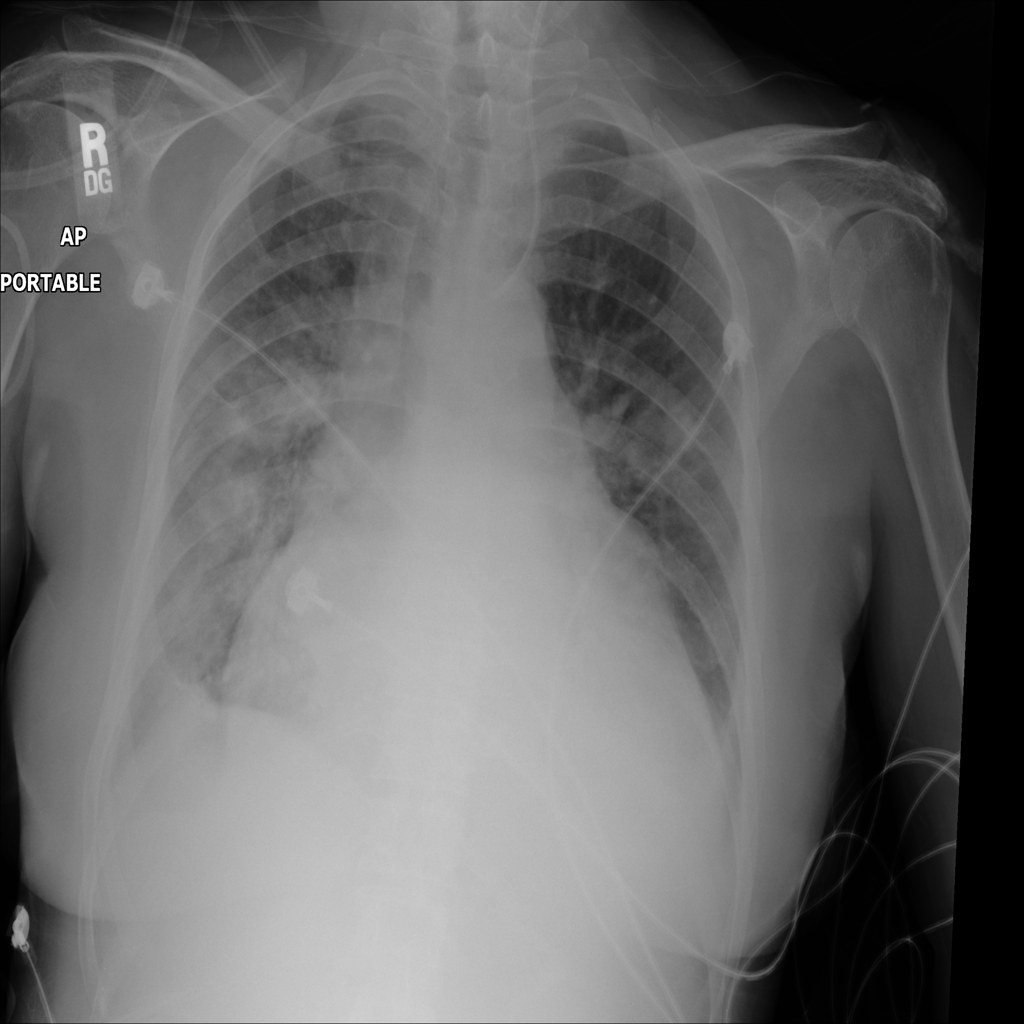

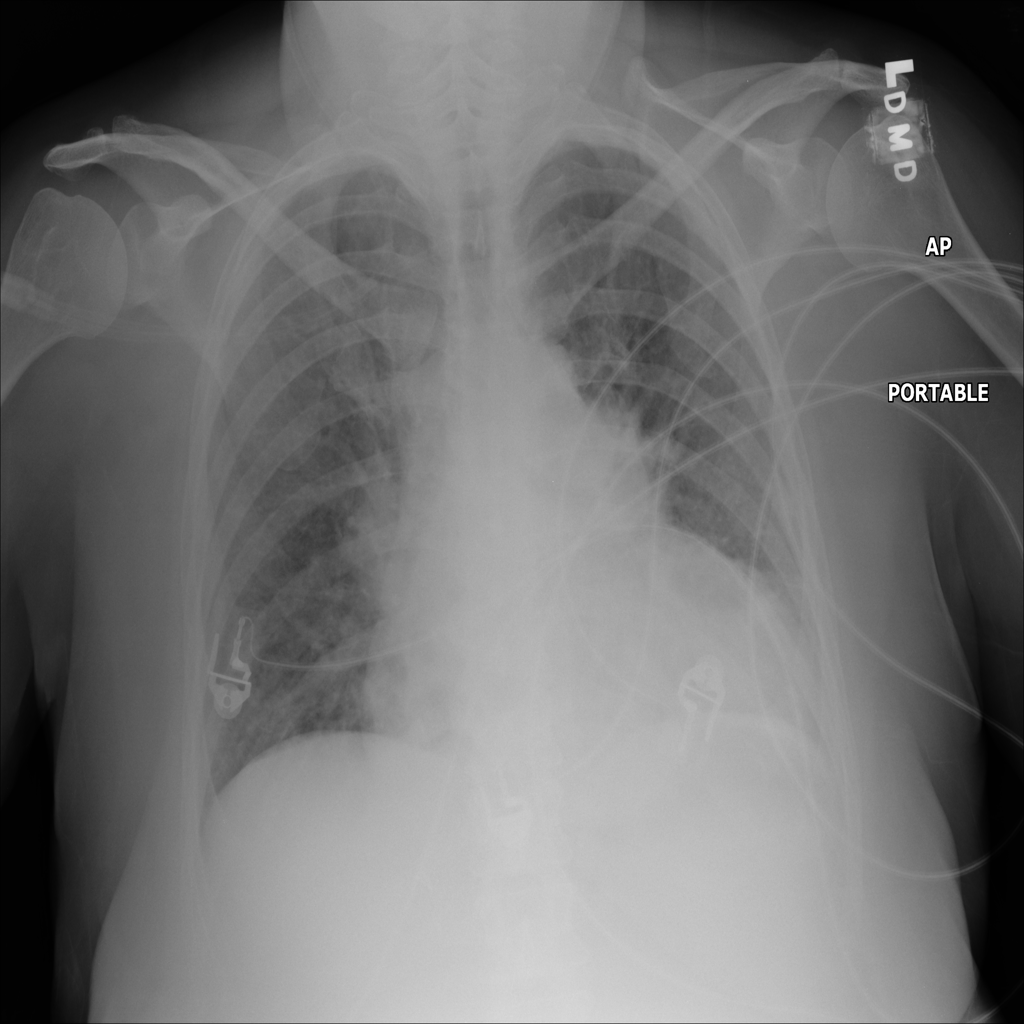

In [27]:
imagepath = "/content/drive/MyDrive/Colab Notebooks/NIH/images/"
image_array = list(df1[df1['Finding Label']=='Cardiomegaly']['Image Index'].map(lambda x: imagepath + x).values)
for path in image_array[0:6]:
  display(Image(filename=path, width = 150, height = 150))

<Axes: xlabel='Finding Label', ylabel='count'>

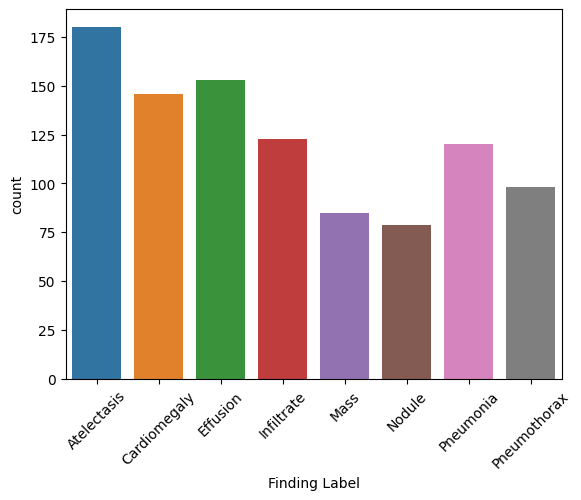